In [1]:
# Imports -----------------------------------------------------------------------------
import numpy as np
import matplotlib
#matplotlib.use('Agg') # To generate images without having a windows appear
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
c1 = "channel1"
arq1 = c1 + ".txt"

c2 = "channel2"
arq2 = c2 + ".txt"

c3 = "channel3"
arq3 = c3 + ".txt"

c4 = "channel4"
arq4 = c4 + ".txt"

# Todas as linhas da TAG

# 100 tentativas --> 100*1000pontos=100000

In [3]:
plt.rcParams['figure.figsize'] = (25.0,5.0)
dataFile1 = open(arq1, 'r')
dataFile2 = open(arq2, 'r')
dataFile3 = open(arq3, 'r')
dataFile4 = open(arq4, 'r')


In [4]:
for line in dataFile1:
    line = line.replace("[","")
    line = line.replace("]","") 
    aux1 = line.split(',')
for line in dataFile2:
    line = line.replace("[","")
    line = line.replace("]","") 
    aux2 = line.split(',')   
for line in dataFile3:
    line = line.replace("[","")
    line = line.replace("]","") 
    aux3 = line.split(',')
for line in dataFile4:
    line = line.replace("[","")
    line = line.replace("]","") 
    aux4 = line.split(',') 
    
#canais['Sinal1']=aux1
#canais['Sinal2']=aux2
#canais['Sinal3']=aux3
#canais['Sinal4']=aux4

# Tratando os valores

In [5]:
chanelOneData=[]
chanelTwoData=[]
chanelThreeData=[]
chanelFourData=[]
for i in aux1:
    chanelOneData.append(float(i))
for i in aux2:
    chanelTwoData.append(float(i))
for i in aux3:
    chanelThreeData.append(float(i))
for i in aux4:
    chanelFourData.append(float(i))

In [6]:
tamanho=len(chanelOneData)

In [7]:
tamanho

100190

In [8]:
channels = ['C3', 'tentativas', 'C4', 'Cp3']

# Plotando Tag

Text(0,0.5,'tentativas')

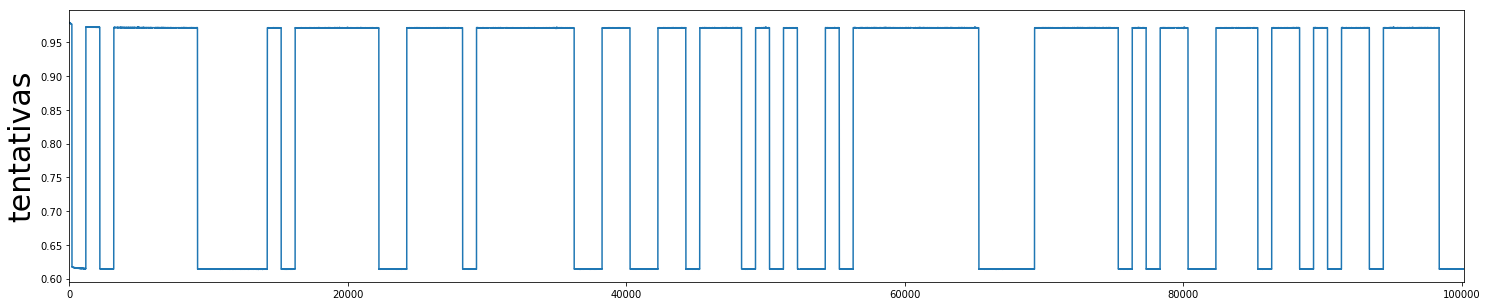

In [9]:
fig, ax = plt.subplots()
#CHANNEL tag
# set x limits
ax.set_xlim(0,tamanho)

# plot signal
ax.plot(np.arange(tamanho), chanelTwoData)

ax.set_ylabel(channels[1], fontsize = 30)

#fig.savefig('img/%s-raw.png' % name) 

# Verifica quantas linhas ignorar 

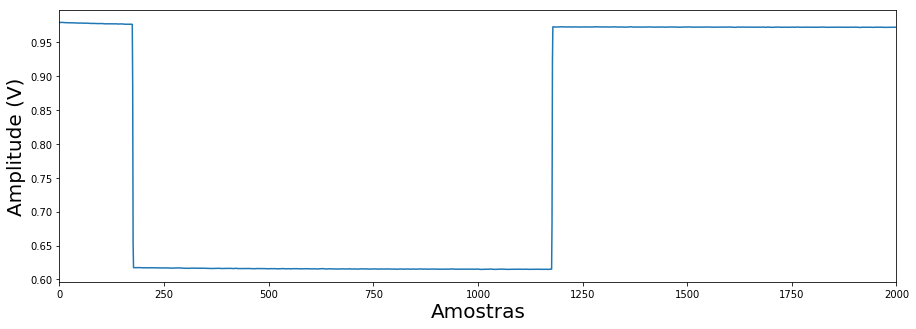

In [10]:
plt.rcParams['figure.figsize'] = (15.0,5.0)
n=1
fig, ax = plt.subplots()
#CHANNEL TAG
# set x limits
ax.set_xlim(0,2000)

# plot signal
ax.plot(np.arange(2000), chanelTwoData[0:2000])

ax.set_ylabel('Amplitude (V)', fontsize = 20)
ax.set_xlabel('Amostras', fontsize = 20)
fig.savefig('Teste_1_2000_pontos') 

In [11]:
count=0
for i in chanelTwoData[0:200]:
    #print i
    if i>0.619999999999:
        #print int(i)
        count=count+1
print count #pontos a serem ignorados

177


In [12]:
#chanelOneData[176:179] # --> -1 foot and 0 hand

In [13]:
ignora=count

In [14]:
ignora

177

In [15]:
tamanho

100190

In [16]:
total=(tamanho-ignora)
print(total)

100013


# Verificar pontos a ignorar no fim

In [17]:
total/1000 #13

100

In [18]:
ignora_fim = total - 100000

In [19]:
ignora_fim

13

In [20]:
total_final=((tamanho-ignora) - ignora_fim)
print total_final

100000


# Ignorando as linhas necessárias

In [21]:
t=0
tag=[]
one=[]
two=[]
three=[]
four=[]

for k in chanelOneData[ignora:(tamanho-ignora_fim)]:
    one.append(k)      
for j in chanelTwoData[ignora:(tamanho-ignora_fim)]:
    tag.append(j)      
for m in chanelThreeData[ignora:(tamanho-ignora_fim)]:
    three.append(m)        
for x in chanelFourData[ignora:(tamanho-ignora_fim)]:
    four.append(x)   
    t=t+1

In [22]:
len(tag)

100000

# Exportando os dados

In [23]:
channels = ['C3', 'Cp3', 'C4']
dataset = pd.DataFrame(columns = channels)

In [24]:
dataset['C3'] = one
dataset['Cp3'] = three
dataset['C4'] = four
#dataset['tag'] = tag

In [25]:
dataset.to_csv('dataset.csv', index = False, encoding='utf-8')

# Plot correto

In [26]:
len(tag)

100000

In [27]:
plt.rcParams['figure.figsize'] = (25.0,5.0)

fig, ax = plt.subplots()
#CHANNEL TAG
# set x limits
ax.set_xlim(0,len(tag))

# plot signal
ax.plot(np.arange(len(tag)), tag)

#ax.set_ylabel(channels[3], fontsize = 30)

Text(0,0.5,'tag')

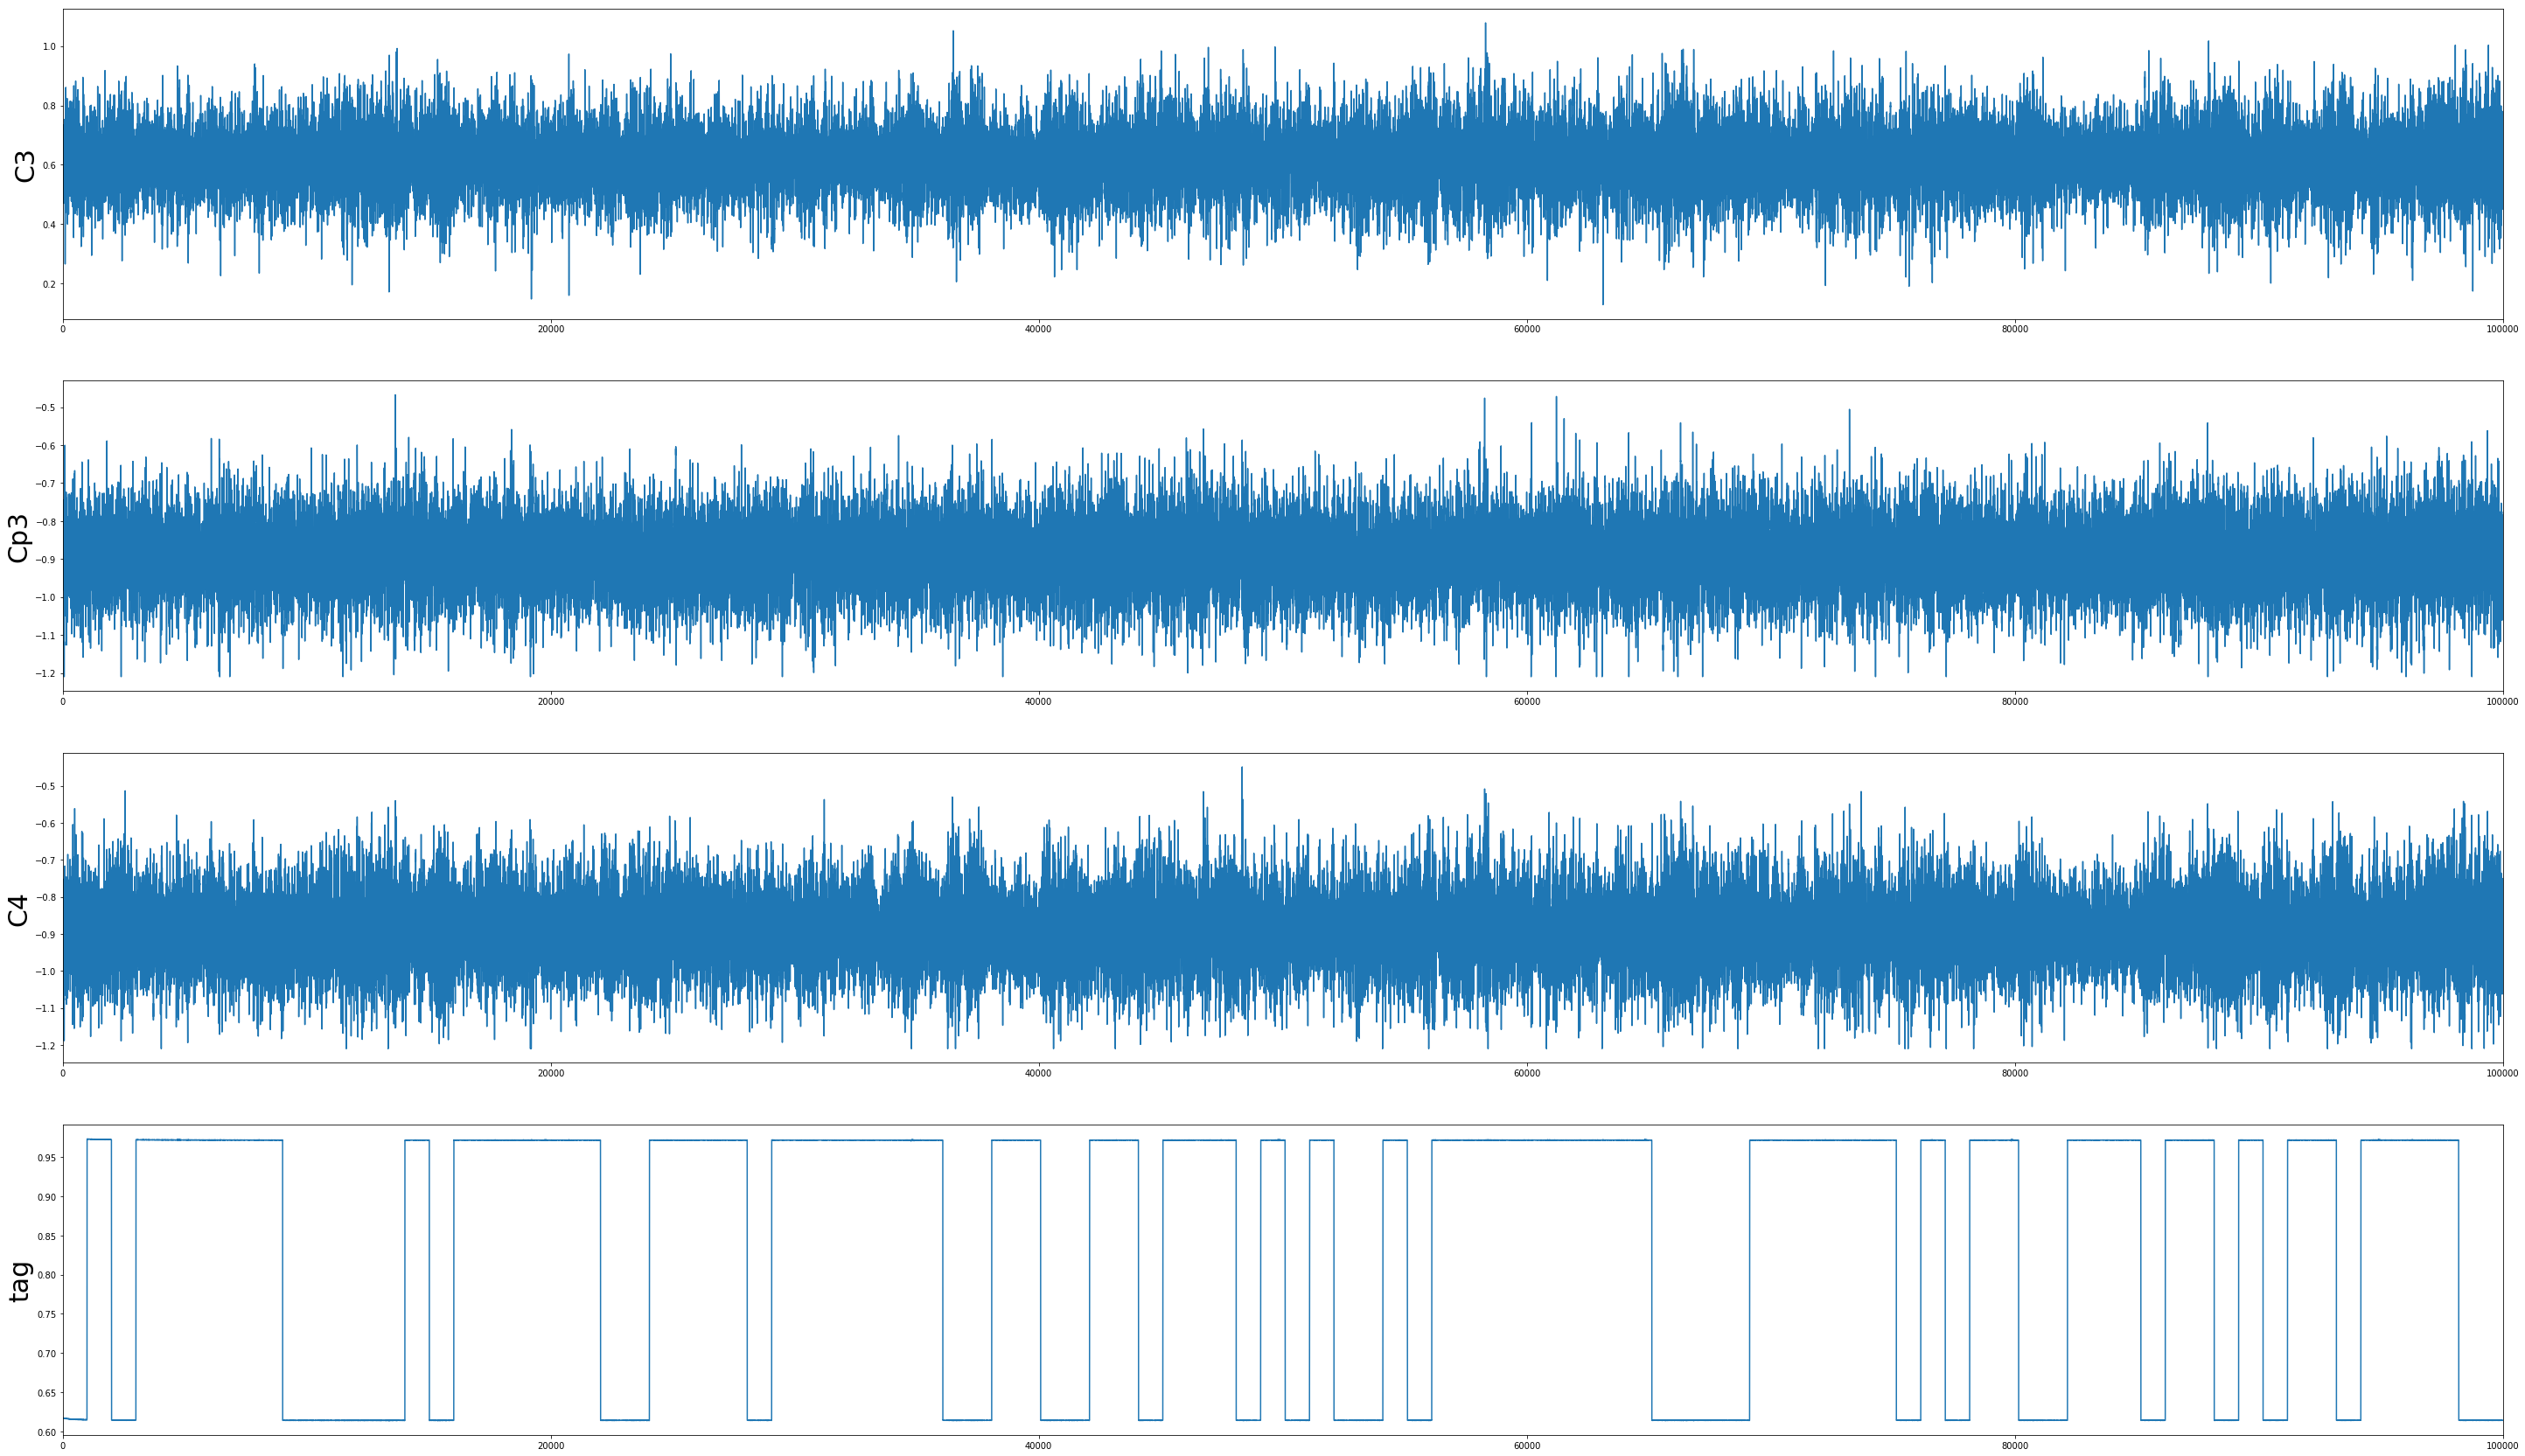

In [28]:
plt.rcParams['figure.figsize'] = (50.0,30.0)
fig, ax = plt.subplots(4,1)
channels = ['C3', 'Cp3', 'C4', 'tag']
#CHANNEL 1
# set x limits
ax[0].set_xlim(0,len(one))

# plot signal
ax[0].plot(np.arange(len(one)), one)

ax[0].set_ylabel(channels[0], fontsize = 30)


#CHANNEL 2
# set x limits
ax[1].set_xlim(0,len(three))

# plot signal
ax[1].plot(np.arange(len(three)), three)

ax[1].set_ylabel(channels[1], fontsize = 30)


#CHANNEL 3
# set x limits
ax[2].set_xlim(0,len(four))

# plot signal
ax[2].plot(np.arange(len(four)), four)

ax[2].set_ylabel(channels[2], fontsize = 30)


#CHANNEL 4
# set x limits
ax[3].set_xlim(0,len(tag))

# plot signal
ax[3].plot(np.arange(len(tag)), tag)

ax[3].set_ylabel(channels[3], fontsize = 30)


# Verifica o que foi cada uma das 100 tentativas

# tentativa 1 -- foot

Text(0,0.5,'tag')

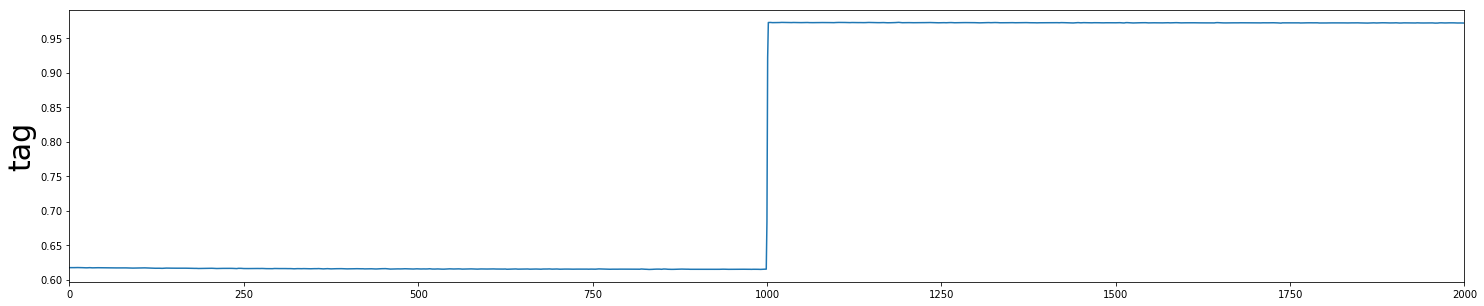

In [36]:
plt.rcParams['figure.figsize'] = (25.0,5.0)
n=2
fig, ax = plt.subplots()
#CHANNEL TAG
# set x limits
ax.set_xlim(0,len(tag[0:1000*n]))

# plot signal
ax.plot(np.arange(len(tag[0:1000*n])), tag[0:1000*n])

ax.set_ylabel(channels[3], fontsize = 30)

# tentativa 2 -- hand

Text(0,0.5,'tag')

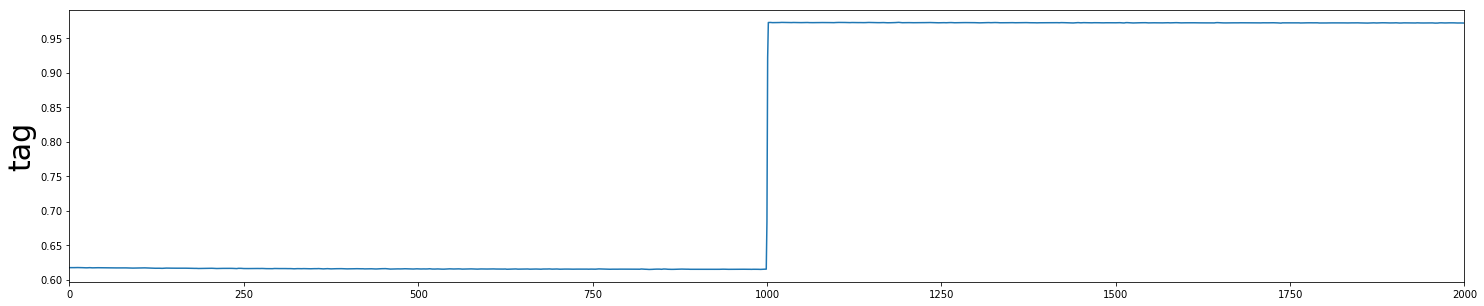

In [37]:
plt.rcParams['figure.figsize'] = (25.0,5.0)
n=2
fig, ax = plt.subplots()
#CHANNEL TAG
# set x limits
ax.set_xlim(0,len(tag[0:1000*n]))

# plot signal
ax.plot(np.arange(len(tag[0:1000*n])), tag[0:1000*n])

ax.set_ylabel(channels[3], fontsize = 30)

# tentativa 3 -- foot

Text(0,0.5,'tag')

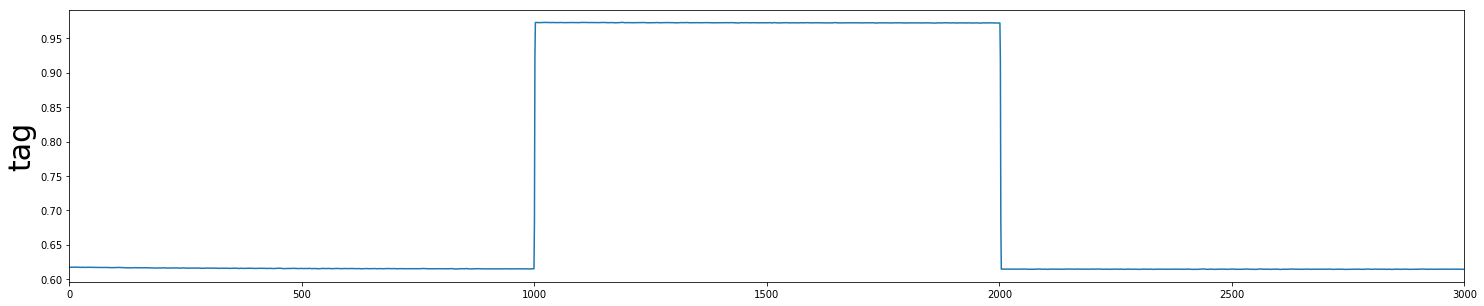

In [38]:
plt.rcParams['figure.figsize'] = (25.0,5.0)
n=3
fig, ax = plt.subplots()
#CHANNEL TAG
# set x limits
ax.set_xlim(0,len(tag[0:1000*n]))

# plot signal
ax.plot(np.arange(len(tag[0:1000*n])), tag[0:1000*n])

ax.set_ylabel(channels[3], fontsize = 30)

# tentativa 4 -- hand

Text(0,0.5,'tag')

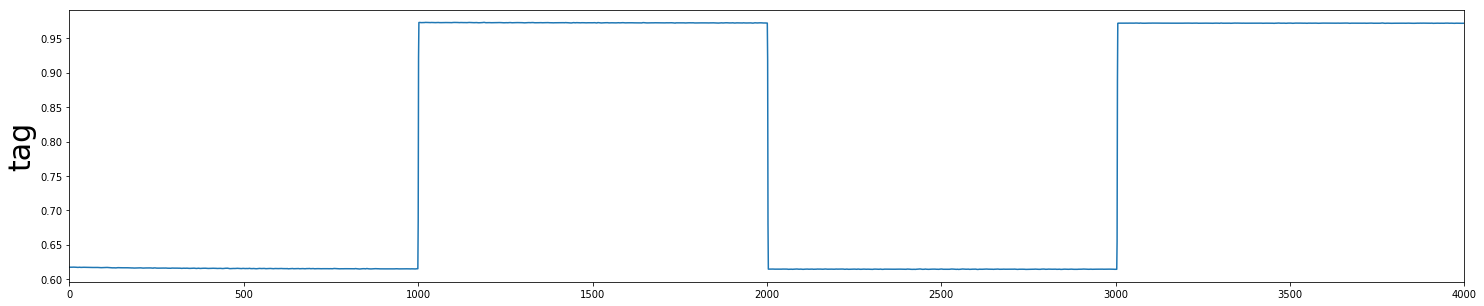

In [39]:
plt.rcParams['figure.figsize'] = (25.0,5.0)
n=4
fig, ax = plt.subplots()
#CHANNEL TAG
# set x limits
ax.set_xlim(0,len(tag[0:1000*n]))

# plot signal
ax.plot(np.arange(len(tag[0:1000*n])), tag[0:1000*n])

ax.set_ylabel(channels[3], fontsize = 30)

# tentativa 5 -- hand

Text(0,0.5,'tag')

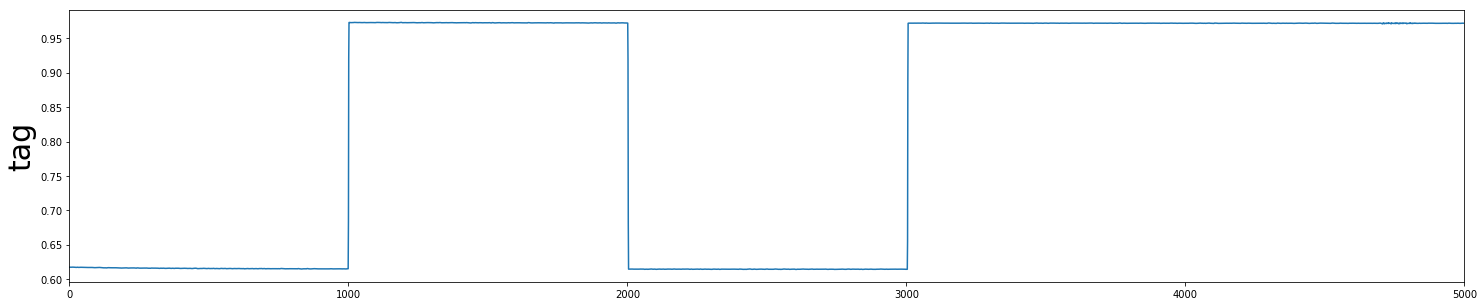

In [40]:
plt.rcParams['figure.figsize'] = (25.0,5.0)
n=5
fig, ax = plt.subplots()
#CHANNEL TAG
# set x limits
ax.set_xlim(0,len(tag[0:1000*n]))

# plot signal
ax.plot(np.arange(len(tag[0:1000*n])), tag[0:1000*n])

ax.set_ylabel(channels[3], fontsize = 30)

# tentativa 6 -- hand

In [41]:
plt.rcParams['figure.figsize'] = (25.0,5.0)
n=6
fig, ax = plt.subplots()
#CHANNEL TAG
# set x limits
ax.set_xlim(0,len(tag[0:1000*n]))

# plot signal
ax.plot(np.arange(len(tag[0:1000*n])), tag[0:1000*n])

ax.set_ylabel(channels[3], fontsize = 30)

Text(0,0.5,'tag')

# tentativa 7 -- hand

In [42]:
plt.rcParams['figure.figsize'] = (25.0,5.0)
n=7
fig, ax = plt.subplots()
#CHANNEL TAG
# set x limits
ax.set_xlim(0,len(tag[0:1000*n]))

# plot signal
ax.plot(np.arange(len(tag[0:1000*n])), tag[0:1000*n])

ax.set_ylabel(channels[3], fontsize = 30)

Text(0,0.5,'tag')

# tentativa 8 -- hand

In [43]:
plt.rcParams['figure.figsize'] = (25.0,5.0)
n=8
fig, ax = plt.subplots()
#CHANNEL TAG
# set x limits
ax.set_xlim(0,len(tag[0:1000*n]))

# plot signal
ax.plot(np.arange(len(tag[0:1000*n])), tag[0:1000*n])

ax.set_ylabel(channels[3], fontsize = 30)

Text(0,0.5,'tag')

# tentativa 9 -- hand

In [44]:
plt.rcParams['figure.figsize'] = (25.0,5.0)
n=9
fig, ax = plt.subplots()
#CHANNEL TAG
# set x limits
ax.set_xlim(0,len(tag[0:1000*n]))

# plot signal
ax.plot(np.arange(len(tag[0:1000*n])), tag[0:1000*n])

ax.set_ylabel(channels[3], fontsize = 30)

Text(0,0.5,'tag')

# tentativa 10 -- foot

In [45]:
plt.rcParams['figure.figsize'] = (25.0,5.0)
n=10
fig, ax = plt.subplots()
#CHANNEL TAG
# set x limits
ax.set_xlim(0,len(tag[0:1000*n]))

# plot signal
ax.plot(np.arange(len(tag[0:1000*n])), tag[0:1000*n])

ax.set_ylabel(channels[3], fontsize = 30)

Text(0,0.5,'tag')

# tentativa 11 -- foot

Text(0,0.5,'tag')

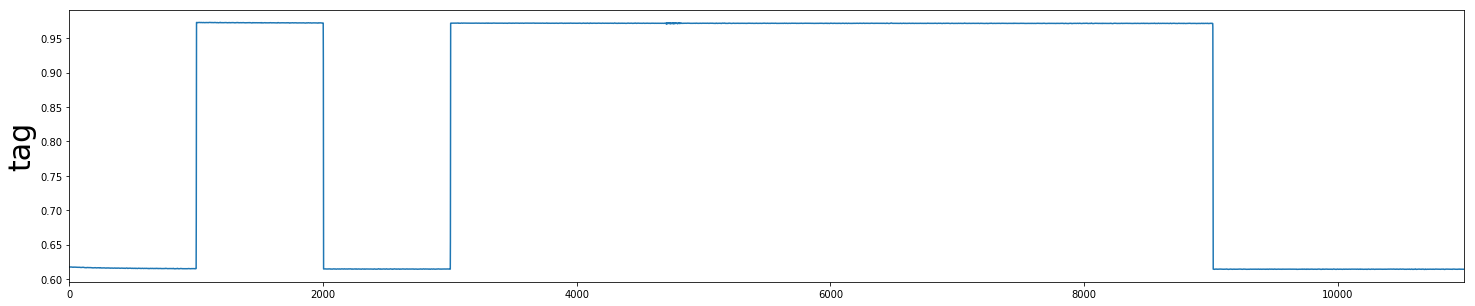

In [46]:
plt.rcParams['figure.figsize'] = (25.0,5.0)
n=11
fig, ax = plt.subplots()
#CHANNEL TAG
# set x limits
ax.set_xlim(0,len(tag[0:1000*n]))

# plot signal
ax.plot(np.arange(len(tag[0:1000*n])), tag[0:1000*n])

ax.set_ylabel(channels[3], fontsize = 30)

# tentativa 12 -- foot

In [47]:
plt.rcParams['figure.figsize'] = (25.0,5.0)
n=12
fig, ax = plt.subplots()
#CHANNEL TAG
# set x limits
ax.set_xlim(0,len(tag[0:1000*n]))

# plot signal
ax.plot(np.arange(len(tag[0:1000*n])), tag[0:1000*n])

ax.set_ylabel(channels[3], fontsize = 30)

Text(0,0.5,'tag')

# tentativa 13 -- foot

In [48]:
plt.rcParams['figure.figsize'] = (25.0,5.0)
n=13
fig, ax = plt.subplots()
#CHANNEL TAG
# set x limits
ax.set_xlim(0,len(tag[0:1000*n]))

# plot signal
ax.plot(np.arange(len(tag[0:1000*n])), tag[0:1000*n])

ax.set_ylabel(channels[3], fontsize = 30)

Text(0,0.5,'tag')

# tentativa 14 -- foot


In [49]:
plt.rcParams['figure.figsize'] = (25.0,5.0)
n=14
fig, ax = plt.subplots()
#CHANNEL TAG
# set x limits
ax.set_xlim(0,len(tag[0:1000*n]))

# plot signal
ax.plot(np.arange(len(tag[0:1000*n])), tag[0:1000*n])

ax.set_ylabel(channels[3], fontsize = 30)

Text(0,0.5,'tag')

# tentativa 15 -- hand

In [50]:
plt.rcParams['figure.figsize'] = (25.0,5.0)
n=15
fig, ax = plt.subplots()
#CHANNEL TAG
# set x limits
ax.set_xlim(0,len(tag[0:1000*n]))

# plot signal
ax.plot(np.arange(len(tag[0:1000*n])), tag[0:1000*n])

ax.set_ylabel(channels[3], fontsize = 30)

Text(0,0.5,'tag')

# tentativa 16 -- foot

Text(0,0.5,'tag')

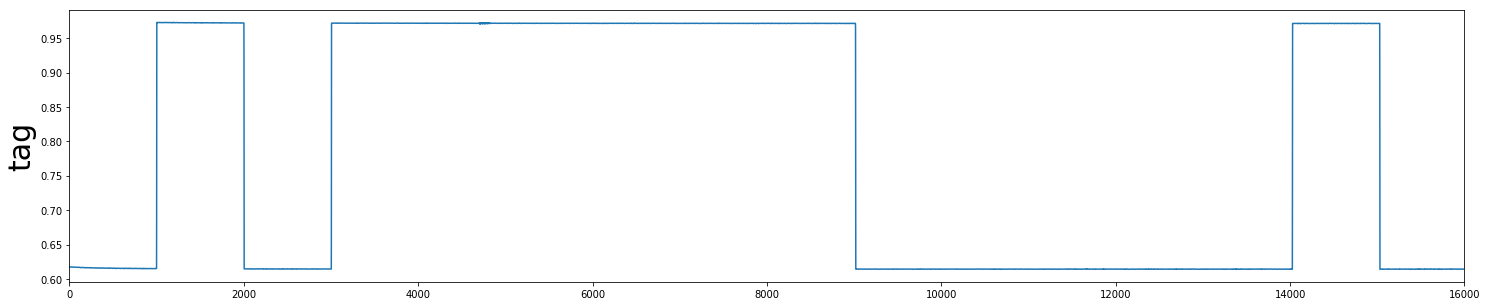

In [51]:
plt.rcParams['figure.figsize'] = (25.0,5.0)
n=16
fig, ax = plt.subplots()
#CHANNEL TAG
# set x limits
ax.set_xlim(0,len(tag[0:1000*n]))

# plot signal
ax.plot(np.arange(len(tag[0:1000*n])), tag[0:1000*n])

ax.set_ylabel(channels[3], fontsize = 30)

# tentativa 17 -- hand

Text(0,0.5,'tag')

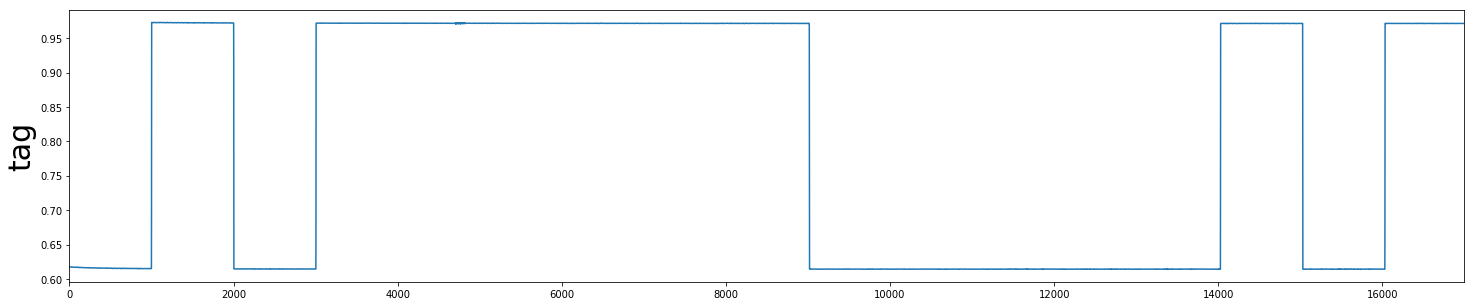

In [52]:
plt.rcParams['figure.figsize'] = (25.0,5.0)
n=17
fig, ax = plt.subplots()
#CHANNEL TAG
# set x limits
ax.set_xlim(0,len(tag[0:1000*n]))

# plot signal
ax.plot(np.arange(len(tag[0:1000*n])), tag[0:1000*n])

ax.set_ylabel(channels[3], fontsize = 30)

# tentativa 18 -- hand

In [53]:
plt.rcParams['figure.figsize'] = (25.0,5.0)
n=18
fig, ax = plt.subplots()
#CHANNEL TAG
# set x limits
ax.set_xlim(0,len(tag[0:1000*n]))

# plot signal
ax.plot(np.arange(len(tag[0:1000*n])), tag[0:1000*n])

ax.set_ylabel(channels[3], fontsize = 30)

Text(0,0.5,'tag')

# tentativa 99 -- foot

Text(0,0.5,'tag')

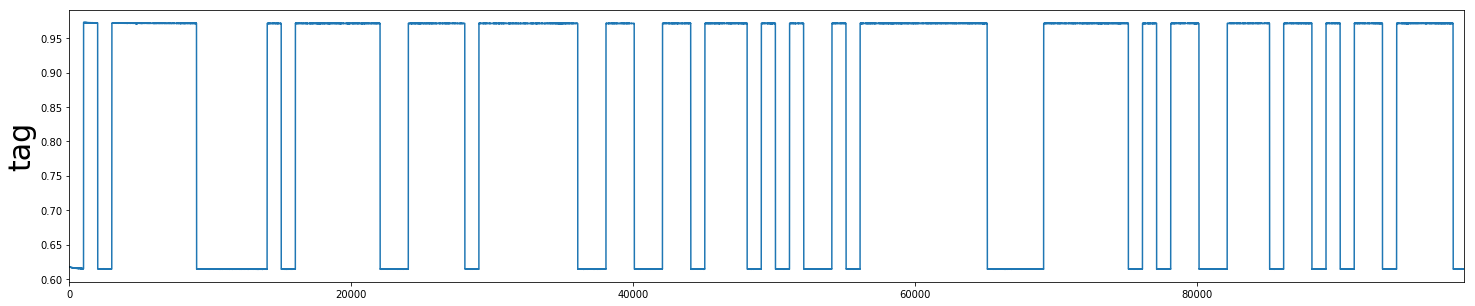

In [54]:
plt.rcParams['figure.figsize'] = (25.0,5.0)
n=99
fig, ax = plt.subplots()
#CHANNEL TAG
# set x limits
ax.set_xlim(0,len(tag[0:1000*n]))

# plot signal
ax.plot(np.arange(len(tag[0:1000*n])), tag[0:1000*n])

ax.set_ylabel(channels[3], fontsize = 30)

# tentativa 100 -- foot

Text(0,0.5,'tag')

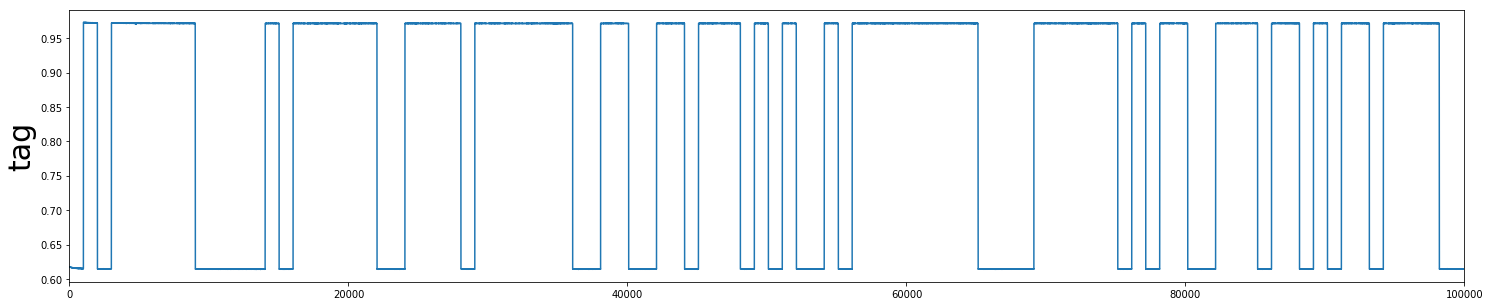

In [55]:
plt.rcParams['figure.figsize'] = (25.0,5.0)
n=100
fig, ax = plt.subplots()
#CHANNEL TAG
# set x limits
ax.set_xlim(0,len(tag[0:1000*n]))

# plot signal
ax.plot(np.arange(len(tag[0:1000*n])), tag[0:1000*n])

ax.set_ylabel(channels[3], fontsize = 30)